# Task 5: Decision Trees and Random Forests

In [7]:
pip install graphviz

   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   ----------------- ---------------------- 20.5/47.1 kB 330.3 kB/s eta 0:00:01
   ---------------------------------------- 47.1/47.1 kB 472.9 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


#### __Importing necessary libraries__

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import graphviz

### __1.Train a Decision Tree Classifier and visualize the tree.__


In [15]:
df=pd.read_csv("D:/AI ML Intern Elevate Labs Benglore/Task 5 Decision Trees and Random Forests/heart disease.csv")

In [19]:
X=df.drop("target",axis=1)
y=df['target']

In [31]:
X_train,X_test,y_train,y_test=train_test_split(
    X,y,
    test_size=0.2,
    random_state=42
)

In [89]:
dt_clf=DecisionTreeClassifier(
    max_depth=3,
    min_samples_leaf=5,
    random_state=42
)

In [91]:
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

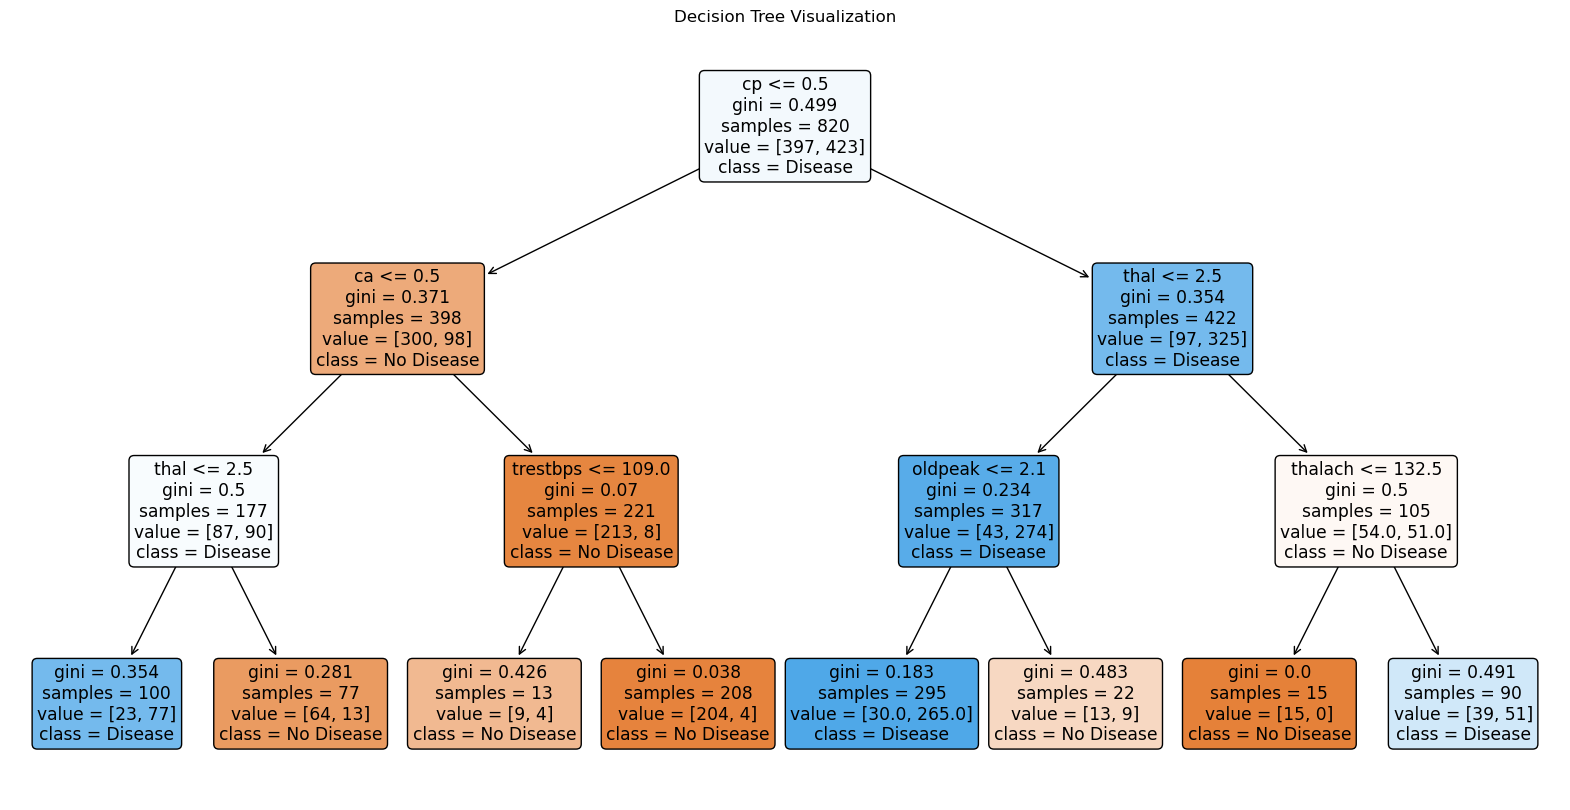

In [95]:
# 6. Visualize Decision Tree
plt.figure(figsize=(20,10))  # Set plot size
plot_tree(
    dt_clf, 
    feature_names=X.columns,  # Use actual feature names
    class_names=['No Disease', 'Disease'], 
    filled=True, 
    rounded=True
)
plt.title("Decision Tree Visualization")
plt.show()

### __2.Analyze overfitting and control tree depth.__

#### Find when the decision tree has highest validation score from 2 to 15 depths

In [105]:
from sklearn.model_selection import cross_val_score
import numpy as np
depths = range(2, 15)
cv_scores = [cross_val_score(DecisionTreeClassifier(max_depth=d), 
                            X, y, cv=5).mean() 
             for d in depths]
optimal_depth = depths[np.argmax(cv_scores)]  # Depth with highest validation score[2][5]
print(cv_scores)
print(optimal_depth)

[0.7365853658536585, 0.8302439024390245, 0.8341463414634147, 0.8829268292682928, 0.9502439024390243, 0.9717073170731707, 0.9804878048780488, 0.9912195121951219, 1.0, 0.9960975609756098, 1.0, 1.0, 1.0]
10


#### So Now as example we compare the highest validation depth(10) that we found using the previous cell with depth of 3 

In [99]:
# Train a Decision Tree with max_depth=3
clf_depth3 = DecisionTreeClassifier(max_depth=3)   # Create the model
clf_depth3.fit(X_train, y_train)                   # Train on training data

# Train a Decision Tree with max_depth=10
clf_depth10 = DecisionTreeClassifier(max_depth=10) # Create the model
clf_depth10.fit(X_train, y_train)                  # Train on training data

# Now you can evaluate their performance
print(f"Train Accuracy (depth=3): {clf_depth3.score(X_train, y_train):.2f}")
print(f"Test Accuracy (depth=3): {clf_depth3.score(X_test, y_test):.2f}")
print(f"Train Accuracy (depth=10): {clf_depth10.score(X_train, y_train):.2f}")
print(f"Test Accuracy (depth=10): {clf_depth10.score(X_test, y_test):.2f}")

Train Accuracy (depth=3): 0.85
Test Accuracy (depth=3): 0.78
Train Accuracy (depth=10): 1.00
Test Accuracy (depth=10): 0.99


#### Why it matters:

Large gap between train/test scores indicates overfitting and for Decision tree with depth 10 is efficient one since it has low risk of overfitting 

### __3.Train a Random Forest and compare accuracy__

In [109]:
rf_clf=RandomForestClassifier(
    max_depth=5,
    n_estimators=100,
    random_state=42)
rf_clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [145]:
dt_pred=dt_clf.predict(X_test)
print("Decision Tree Results:")
print(f"{accuracy_score(y_test,dt_pred):.2f}")
print(classification_report(y_test,dt_pred))

rf_pred=rf_clf.predict(X_test)
print("\nRandom Forest Results:")
print(f"{accuracy_score(y_test,rf_pred):.2f}")
print(classification_report(y_test,rf_pred))

Decision Tree Results:
0.78
              precision    recall  f1-score   support

           0       0.85      0.68      0.75       102
           1       0.73      0.88      0.80       103

    accuracy                           0.78       205
   macro avg       0.79      0.78      0.78       205
weighted avg       0.79      0.78      0.78       205


Random Forest Results:
0.87
              precision    recall  f1-score   support

           0       0.93      0.80      0.86       102
           1       0.83      0.94      0.88       103

    accuracy                           0.87       205
   macro avg       0.88      0.87      0.87       205
weighted avg       0.88      0.87      0.87       205



#### 1. Decision Tree Results (Accuracy = 78%)

_Observations:_

+ Class 0 (No Disease):

High precision (0.85): When it predicts "No Disease", it's often right.

Lower recall (0.68): It misses some actual "No Disease" cases (false negatives).

+ Class 1 (Disease):

Lower precision (0.73): Some false positives—mistaking healthy people as sick.

High recall (0.88): Most actual "Disease" cases are caught.

__Summary: The decision tree tends to favor detecting Disease more accurately (higher recall), but sometimes wrongly flags healthy people.__

#### Random Forest Results (Accuracy = 87%)

_Observations:_

+ Class 0:

Very high precision (0.93): Very few false positives.

Higher recall than decision tree (0.80): Fewer missed healthy cases.

+ Class 1:

Higher precision (0.83) and recall (0.94): Catches most real disease cases with fewer mistakes.

__Summary: Random forest gives better balance for both classes and higher accuracy, thanks to ensemble learning and reduction in overfitting.__

__✅ Random Forest performs better overall.__

### __4.Interpret feature importances.__

In [125]:
# 9. Feature Importance Analysis
importances = rf_clf.feature_importances_
sorted_idx = importances.argsort()[::-1]  # Sort descending
print(sorted_idx)
print(importances)

[ 2 12 11  9  7  8  0 10  4  3  1  6  5]
[0.05761661 0.02709101 0.16446118 0.0429093  0.04364416 0.00380024
 0.00663747 0.11184518 0.06919697 0.12986873 0.04945751 0.14619063
 0.147281  ]


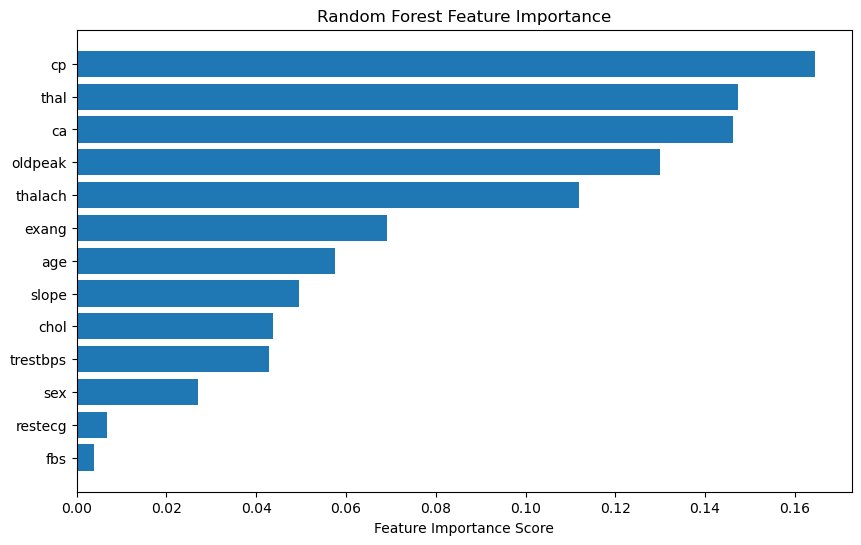

In [131]:
plt.figure(figsize=(10,6))
plt.barh(X.columns[sorted_idx], importances[sorted_idx])
plt.xlabel("Feature Importance Score")
plt.title("Random Forest Feature Importance")
plt.gca().invert_yaxis()  # Show most important at top
plt.show()

### __5.Evaluate using cross-validation.__

In [135]:
dt_score=cross_val_score(dt_clf,X,y,cv=5)
rf_score=cross_val_score(rf_clf,X,y,cv=5)

In [160]:
print(f"\nDecision Tree CV Accuracy: {dt_scores.mean():.2f} (±{dt_scores.std():.2f})")
print(f"Random Forest CV Accuracy: {rf_scores.mean():.2f} (±{rf_scores.std():.2f})")


Decision Tree CV Accuracy: 0.83 (±0.02)
Random Forest CV Accuracy: 0.93 (±0.03)
